# Compression testing for MDF cores

In [2]:
### DEPENDENCIES
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
def makeDataframe(csvPath):
    df = pd.read_csv(csvPath)
    df = df[1:]
    return df

In [4]:
def graphDataframe(df):
    
    ext = df['Extension']
    load = df['Load']

    ext = [float(x) for x in ext]
    load = [float(y) for y in load]
    fig = plt.figure()
    
    fig.set_size_inches(10,10)  # OR
    plt.scatter(ext, load)

    fig.suptitle('Extension vs. Load', fontsize=20)
    plt.xlabel('Compressive Extension (mm)', fontsize=16)
    plt.ylabel('Compressive Load (N)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()

def toFloat(x):
    return float(x)

def seaborn(df):
    ext = df['Extension'].apply(toFloat)
    load = df['Load'].apply(toFloat)
        
    sns.jointplot(ext,load)
    
def opposite(x):
    return -float(x)

def rotateGraph(df):
    """Returns opposites of values so graphs are correct with values"""    
    df['Extension'] = df['Extension'].apply(opposite)
    df['Load'] = df['Load'].apply(opposite)

    return df
    
# df = makeDataframe('./data/CompressionCore/Core25-15.csv')
# df = rotateGraph(df)
# seaborn(df)
# graphDataframe(df)

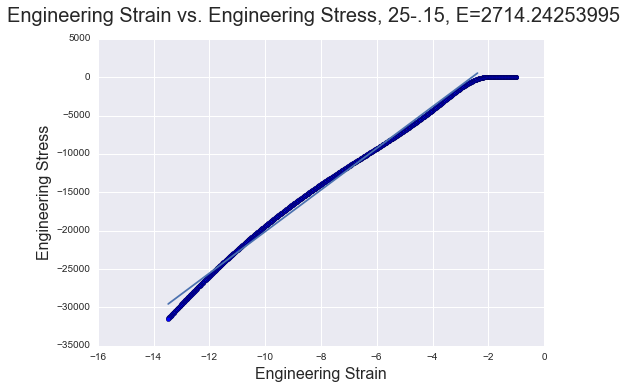

In [5]:
def engineeringStrain(extensions, length):
    epsilon = []
    for extension in extensions:
        epsilon.append((extension - length)/length)
    return epsilon

def engineeringStress(loads, area):
    sigma = []
    for load in loads:
        sigma.append(load/area)
    return sigma

def graphStressStrain(df, length, area, sample, estimate=-2.4):
    
    extensions = df['Extension']
    loads = df['Load']

    extensions = [float(x) for x in extensions]
    loads = [float(y) for y in loads]
    
    strains = engineeringStrain(extensions, length)
    stresses = engineeringStress(loads, area)
    
    chopPoint = chopData(strains, estimate)
    
    modStrains = strains[chopPoint:]
    modStresses = stresses[chopPoint:]
    modStrains = np.array(modStrains)
    modStresses = np.array(modStresses)
    
    fig, ax = plt.subplots()
    fit = np.polyfit(modStrains, modStresses, deg=1)
    compressionModulus = fit[0]
    ax.plot(modStrains, fit[0]*modStrains + fit[1])
    ax.scatter(strains, stresses)

    fig.suptitle('Engineering Strain vs. Engineering Stress, {}, E={}'.format(sample, compressionModulus), fontsize=20)
    plt.xlabel('Engineering Strain', fontsize=16)
    plt.ylabel('Engineering Stress', fontsize=16)

    plt.show()

def chopData(dataList, estimate):
    for data in dataList[::-1]:
        if data < estimate:
            continue
        else:
            return dataList.index(data)
    
s25_15 = makeDataframe('./data/CompressionCore/Core25-15.csv')
graphStressStrain(s25_15, .25, 3.1793, "25-.15")

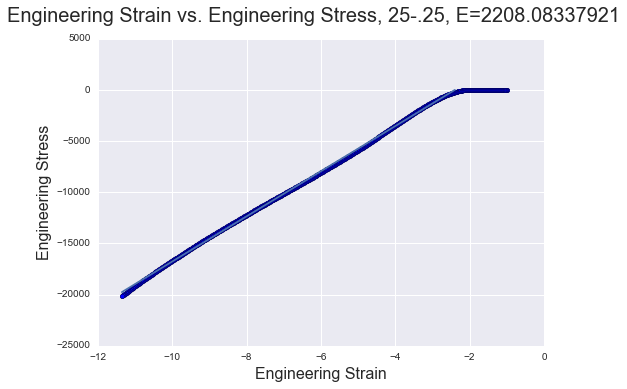

In [6]:
s25_25 = makeDataframe('./data/CompressionCore/Core25-25.csv')
graphStressStrain(s25_25, .25, 4.9657, "25-.25")

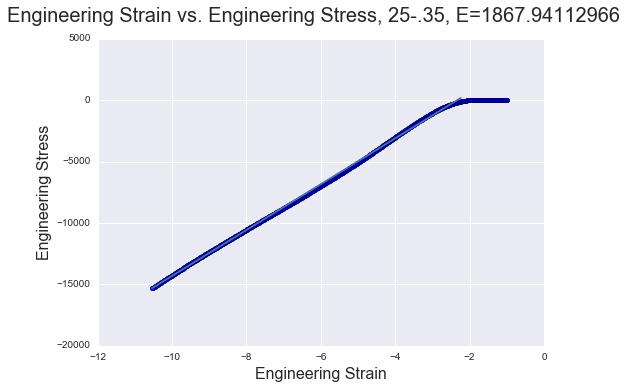

In [7]:
s25_35 = makeDataframe('./data/CompressionCore/Core25-35.csv')
graphStressStrain(s25_35, .25, 6.5268, "25-.35")